In [9]:
import numpy as np
import pandas as pd
from model.classification_model import ClassifierModel

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [11]:
x, y = pd.read_csv("main_datasets/dataset.csv", index_col=0), pd.read_csv("main_datasets/target.csv", index_col=0)

In [10]:
def tsne_plot(x1, y1, name):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
    plt.title(name)
    plt.legend()
    plt.show()

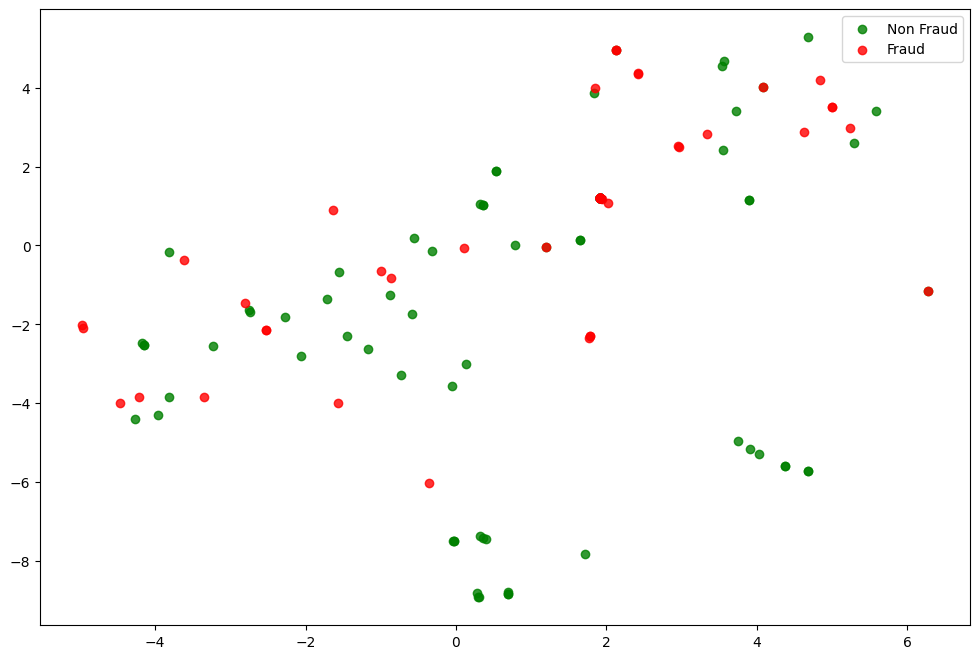

In [13]:
tsne_plot(x, y.values, "")

In [16]:
x_red = TSNE(n_components=3).fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([12,  9], dtype=int64))

In [29]:
model = ClassifierModel()

In [30]:
y_train

,target
to5cm6b05277_si_004,0.0
toDMFsolvatedFebdp298K1058448,0.0
fromVMOP-+1878068,0.0
fromDUT-49Zn296K890363,0.0
to3D854461,0.0
...,...
toCCDC_2065041_JUK-20-noh,0.0
from3in61515548,0.0
fromDUT-49Ni296K1957605,0.0
toDUT-30Znafterphasetransition804771,0.0


In [31]:
model.cv(pd.DataFrame(X_train), y_train)

evaluate CatBoost
  0%|          | 0/9223372036854775807 [00:00<?, ?trial/s, best loss=?]

  0%|          | 1/9223372036854775807 [00:13<34505463974106671:47:12, 13.47s/trial, best loss: -0.7090909090909091]
evaluate LGM
  0%|          | 113/9223372036854775807 [00:10<226994337724211:48:16, 11.29trial/s, best loss: -0.38461538461538464]
evaluate XGB
  0%|          | 20/9223372036854775807 [00:10<1302934564680062:17:36,  1.97trial/s, best loss: -0.8666666666666667]
evaluate RF
  0%|          | 53/9223372036854775807 [00:10<487969403380758:11:12,  5.25trial/s, best loss: -0.7090909090909091]
evaluate AdaBoost
  0%|          | 204/9223372036854775807 [00:10<125676622413969:38:08, 20.39trial/s, best loss: -0.8666666666666667]


{'CatBoost': {'depth': 9,
  'l2_leaf_reg': 9.030360690080919,
  'learning_rate': 0.0028093569117633482,
  'n_estimators': 61,
  'score': 0.8545454545454545,
  'balance': {'test': {'0.0': 10, '1.0': 6}, 'train': {'0.0': 43, '1.0': 22}}},
 'LGM': {'learning_rate': 0.00015848874333293275,
  'max_depth': 5,
  'n_estimators': 91,
  'reg_lambda': 0.05558001722324227,
  'score': 0.4074074074074074,
  'balance': {'test': {'0.0': 11, '1.0': 5}, 'train': {'0.0': 42, '1.0': 23}}},
 'XGB': {'learning_rate': 5.6212592288179686e-05,
  'max_depth': 76,
  'n_estimators': 65,
  'reg_lambda': 2.7286680569609554,
  'score': 0.8712121212121212,
  'balance': {'test': {'0.0': 11, '1.0': 6}, 'train': {'0.0': 42, '1.0': 22}}},
 'RF': {'max_depth': 50,
  'n_estimators': 63,
  'score': 0.8545454545454545,
  'balance': {'test': {'0.0': 10, '1.0': 6}, 'train': {'0.0': 43, '1.0': 22}}},
 'AdaBoost': {'learning_rate': 0.008100140451569303,
  'max_depth': 9,
  'n_estimators': 81,
  'score': 0.8785714285714286,
  'ba

In [32]:
res = {'CatBoost': {'depth': 9,
  'l2_leaf_reg': 9.030360690080919,
  'learning_rate': 0.0028093569117633482,
  'n_estimators': 61,
  'score': 0.8545454545454545,
  'balance': {'test': {'0.0': 10, '1.0': 6}, 'train': {'0.0': 43, '1.0': 22}}},
 'LGM': {'learning_rate': 0.00015848874333293275,
  'max_depth': 5,
  'n_estimators': 91,
  'reg_lambda': 0.05558001722324227,
  'score': 0.4074074074074074,
  'balance': {'test': {'0.0': 11, '1.0': 5}, 'train': {'0.0': 42, '1.0': 23}}},
 'XGB': {'learning_rate': 5.6212592288179686e-05,
  'max_depth': 76,
  'n_estimators': 65,
  'reg_lambda': 2.7286680569609554,
  'score': 0.8712121212121212,
  'balance': {'test': {'0.0': 11, '1.0': 6}, 'train': {'0.0': 42, '1.0': 22}}},
 'RF': {'max_depth': 50,
  'n_estimators': 63,
  'score': 0.8545454545454545,
  'balance': {'test': {'0.0': 10, '1.0': 6}, 'train': {'0.0': 43, '1.0': 22}}},
 'AdaBoost': {'learning_rate': 0.008100140451569303,
  'max_depth': 9,
  'n_estimators': 81,
  'score': 0.8785714285714286,
  'balance': {'test': {'0.0': 11, '1.0': 6}, 'train': {'0.0': 42, '1.0': 22}}}}

model.set_params({name: {param: res[name][param] for param in res[name] if param not in ("balance", "score")} for name in res})

In [33]:
model.fit(X_train, y_train.values.ravel())

In [34]:
from sklearn import metrics

In [35]:
for name in model.models:
    print(f"report for {name}")
    print(metrics.classification_report(y_test, model.models[name].predict(X_test)))

report for CatBoost
              precision    recall  f1-score   support

         0.0       0.56      0.83      0.67        12
         1.0       0.33      0.11      0.17         9

    accuracy                           0.52        21
   macro avg       0.44      0.47      0.42        21
weighted avg       0.46      0.52      0.45        21

report for LGM
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73        12
         1.0       0.00      0.00      0.00         9

    accuracy                           0.57        21
   macro avg       0.29      0.50      0.36        21
weighted avg       0.33      0.57      0.42        21

report for XGB
              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79        12
         1.0       0.80      0.44      0.57         9

    accuracy                           0.71        21
   macro avg       0.74      0.68      0.68        21
weighted avg       0.74 

C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [47]:
clf_k = KNeighborsClassifier(n_neighbors=5, p=4)

clf_k.fit(X_train, y_train)

print(metrics.classification_report(y_test, clf_k.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.73      0.92      0.81        12
         1.0       0.83      0.56      0.67         9

    accuracy                           0.76        21
   macro avg       0.78      0.74      0.74        21
weighted avg       0.78      0.76      0.75        21



C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [50]:
clf = GaussianNB()

clf.fit(X_train, y_train)

print(metrics.classification_report(y_test, clf_k.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.73      0.92      0.81        12
         1.0       0.83      0.56      0.67         9

    accuracy                           0.76        21
   macro avg       0.78      0.74      0.74        21
weighted avg       0.78      0.76      0.75        21



C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
